In [1]:
#
# Import all packages
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pydot

## Models used in the assignment
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, validation_curve
from sklearn.preprocessing import StandardScaler
from io import StringIO
from sklearn.tree import export_graphviz

import warnings
# To ignore any future warnings
warnings.filterwarnings("ignore")

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
    

# read the dataset and set skipinitialspace to true to be able to .replace
df = pd.read_csv('./Spotify.csv', skipinitialspace=True, encoding='latin')
print(df.info())

# ID, Name, Type supplement variables removed

# Distribution of Energy
annsales_dist = sns.distplot(df['Energy'].dropna())
plt.show()

# Distribution of Loudness               
sales_dist = sns.distplot(df['Loudness'].dropna())
plt.show()

# Distribution of Speechiness         
sfloorsize_dist = sns.distplot(df['Speechiness'].dropna())
plt.show()

# Distribution of Instrumentalness    
totalInvestment_dist = sns.distplot(df['Instrumentalness'].dropna())
plt.show()

# Distribution of time_signature    
totalInvestment_dist = sns.distplot(df['time_signature'].dropna())
plt.show()

rs = 10

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2980 entries, 0 to 2979
Data columns (total 8 columns):
ID                  2980 non-null object
Name                2980 non-null object
Energy              2980 non-null float64
Loudness            2980 non-null float64
Speechiness         2980 non-null float64
Instrumentalness    2980 non-null float64
Type                2980 non-null object
time_signature      2980 non-null int64
dtypes: float64(4), int64(1), object(3)
memory usage: 186.3+ KB
None


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

Task 1.1 Question 1
Can you identify data quality issues in this dataset such as unusual data types, missing values and others?




Task 1.1 Question 2
What variables did you include in the analysis and what were their roles and measurement level set? Justify your choice.

Energy, loudness, speechiness,  instrumentalness and time signature.
others are supplement variables


Task 1.2 Question 1
 Build a default clustering model with K= 3 and answer the followings:
a. How many records are assigned into each cluster?
b. Plot the cluster distribution using pairplot. Explain key characteristics of each cluster/ segment
Cluster membership
2    1728
0     841
1     411
Name: Cluster_ID, dtype: int64


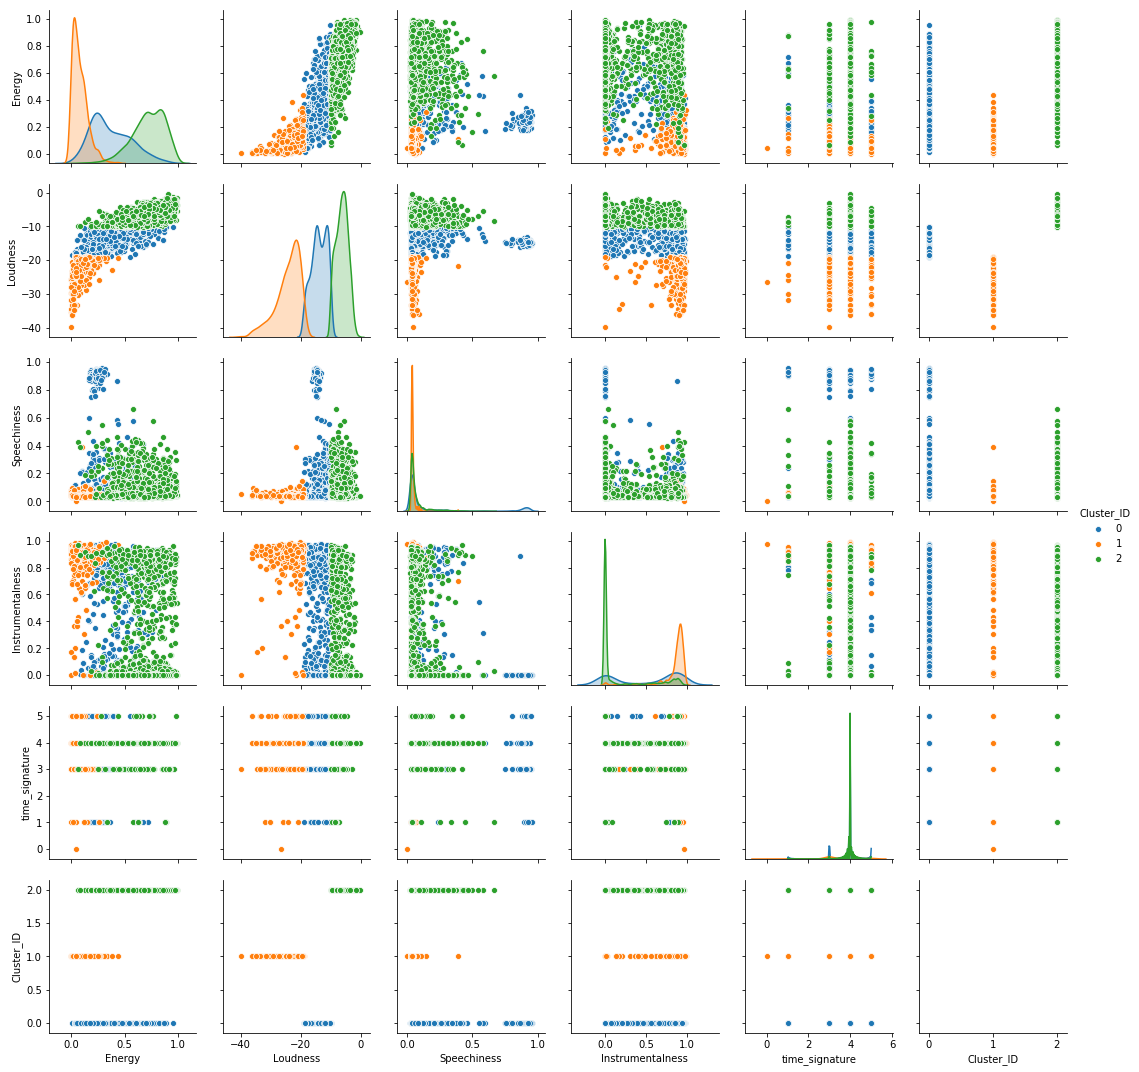



Task 1.2 Question 2
 What is the effect of using the standardization method on the model above? Does the variable normalization process enable a better clustering solution?


In [2]:
#          #
# Task 1.1 #
#          #
print(color.BOLD + "Task 1.1 Question 1" + color.END)
print(color.BOLD + "Can you identify data quality issues in this dataset such as unusual data types, missing values and others?" + color.END)
print("\n")


print(color.BOLD + "\n\nTask 1.1 Question 2" + color.END)
print(color.BOLD +"What variables did you include in the analysis and what were their roles and measurement level set? Justify your choice."+ color.END)
print("\nEnergy, loudness, speechiness,  instrumentalness and time signature.")
print("others are supplement variables")

#          #
# Task 1.2 #
#          #


print(color.BOLD + "\n\nTask 1.2 Question 1" + color.END)
print(color.BOLD + " Build a default clustering model with K= 3 and answer the followings:\
\na. How many records are assigned into each cluster?\nb. Plot the cluster distribution using pairplot. Explain key characteristics \
of each cluster/ segment" + color.END)

# take useful variables and drop the rest
dfDefaultCluster = df[['Energy', 'Loudness', 'Speechiness', 'Instrumentalness', 'time_signature']]

# convert dfDefaultCluster to matrix
X_defaultCluster = dfDefaultCluster.as_matrix()

# scaling
#scaler = StandardScaler()
#X_defaultCluster = scaler.fit_transform(X_defaultCluster)

# set the random state. different random state seeds might result in different centroids locations
model = KMeans(n_clusters=3, random_state=rs)
model.fit(X_defaultCluster)

# assign cluster ID to each record in X
# Ignore the warning, does not apply to our case here
y_defaultCluster = model.predict(X_defaultCluster)
dfDefaultCluster['Cluster_ID'] = y_defaultCluster

# how many records are in each cluster
print("Cluster membership")
print(dfDefaultCluster['Cluster_ID'].value_counts())

# pairplot the cluster distribution.
cluster_g = sns.pairplot(dfDefaultCluster, hue='Cluster_ID')
plt.show()


print(color.BOLD + "\n\nTask 1.2 Question 2" + color.END)
print(color.BOLD + " What is the effect of using the standardization method on the model above? \
Does the variable normalization process enable a better clustering solution?" + color.END)

Task 1.3 Question 1
Using elbow method and silhouette, find the optimal K. What is the best K? Explain your reasoning


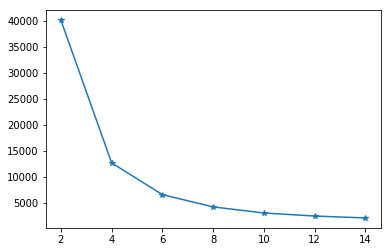

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=10, precompute_distances='auto',
    random_state=10, tol=0.0001, verbose=0)
Silhouette score for k=4 0.5318463480991582


 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=10, precompute_distances='auto',
    random_state=10, tol=0.0001, verbose=0)
Silhouette score for k=6 0.48078296053674496

Task 2 Question 2
What is the effect of using the standardization method on the model above? Does the variablenormalization process enable a better clustering solution?

Task 2 Question 3
Interpret the (best out of 2.1 and 2.2) cluster analysis outcome. In other words, characterize thenature of each cluster by giving it a descriptive label by using distplot


In [11]:
#        #
# Task 1.3 #
#        #

print(color.BOLD + "Task 1.3 Question 1" + color.END)
print(color.BOLD + "Using elbow method and silhouette, find the optimal K. What is the best K? Explain your reasoning" + color.END)
# list to save the clusters and cost
clusters = []
inertia_vals = []

# this whole process should take a while
for k in range(2, 15, 2):
    # train clustering with the specified K
    model = KMeans(n_clusters=k, random_state=rs, n_jobs=10)
    model.fit(X_defaultCluster)
    
    # append model to cluster list
    clusters.append(model)
    inertia_vals.append(model.inertia_)
    
# plot the inertia vs K values
plt.plot(range(2,15,2), inertia_vals, marker='*')
plt.show()

from sklearn.metrics import silhouette_score

print(clusters[1])
print("Silhouette score for k=4", silhouette_score(X_defaultCluster, clusters[1].predict(X_defaultCluster)))

print("\n\n", clusters[2])
print("Silhouette score for k=6", silhouette_score(X_defaultCluster, clusters[2].predict(X_defaultCluster)))

print(color.BOLD + "\nTask 2 Question 2" + color.END)
print(color.BOLD + "What is the effect of using the standardization method on the model above? Does the variable\
normalization process enable a better clustering solution?" + color.END)

print(color.BOLD + "\nTask 2 Question 3" + color.END)
print(color.BOLD + "Interpret the (best out of 2.1 and 2.2) cluster analysis outcome. In other words, characterize the\
nature of each cluster by giving it a descriptive label by using distplot" + color.END)


In [ ]:
#        #
# Task 3 #
#        #

print(color.BOLD + "Task 3 Question 1" + color.END)
print(color.BOLD + "" + color.END)

print(color.BOLD + "\nTask 3 Question 2" + color.END)
print(color.BOLD + "" + color.END)

print(color.BOLD + "\nTask 3 Question 3" + color.END)
print(color.BOLD + "" + color.END)


In [ ]:
#        #
# Task 4 #
#        #

print(color.BOLD + "Task 4 Question 1" + color.END)
print(color.BOLD + "" + color.END)

print(color.BOLD + "\nTask 4 Question 2" + color.END)
print(color.BOLD + "" + color.END)

print(color.BOLD + "\nTask 4 Question 3" + color.END)
print(color.BOLD + "" + color.END)

In [ ]:
#        #
# Task 5 #
#        #

print(color.BOLD + "Task 5 Question 1" + color.END)
print(color.BOLD + "" + color.END)

print(color.BOLD + "\nTask 5 Question 2" + color.END)
print(color.BOLD + "" + color.END)

print(color.BOLD + "\nTask 5 Question 3" + color.END)
print(color.BOLD + "" + color.END)